# Introduction to Data Science and Systems 2019-2020<small><small>v20192020a</small></small>
## Lab 4: Introduction to Probability
#### - ***you should submit this notebook on Moodle along with one pdf file (see the end of the notebook and Moodle for instructions)***
---
#### University of Glasgow,  JHW & BSJ, 2019


$$
\newcommand{\vec}[1]{ {\bf #1}} 
\newcommand{\real}{\mathbb{R}}
\DeclareMathOperator*{\argmin}{arg\,min}
\newcommand{\expect}[1]{\mathbb{E}[#1]}
$$

## Purpose of this lab

This lab should help you:    
* understand basic probability including probability mass functions and probability density functions
* understand how to manipulate marginal, joint and conditional distributions
* understand Bayes' rule
* understand the multivariate normal distribution
* understand how optimisation can be used to estimate parameters in a simple statistical model using maximum likelihood estimation


## Guide

Lab 4 is structured as follows (with two main task sections):

>- Part 1: Probability with discrete random variables
>- Part 2: Probability with continuous random variables

We recommend you read through the lab *carefully* and work through the tasks.

#### Material and resources 
- It is recommended to keep the lecture notes (from lecture 4 and lecture 3 in particular) open while doing this lab exercise. 
    * ... and you should, of course, be prepared to access some of the recommended material.
- If you are stuck, the following resources are very helpful:
 * [NumPy cheatsheet](https://github.com/juliangaal/python-cheat-sheet/blob/master/NumPy/NumPy.md)
 * [NumPy API reference](https://docs.scipy.org/doc/numpy-1.13.0/reference/)
 * [NumPy user guide](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.html)

#### Marking and Feedback
*Note*: This lab is marked out of 80 but accounts for the same overall percentage as the other labs.

This assessed lab is marked using three different techniques;

- Autograded with feedback; you'll get immediate feedback.
- Autograded without (immediate) feedback (there will always be a small demo/test so you can be confident that the format of your answer is correct).
- Manually graded (by an actual human). This type of question generates a pdf file that must be uploaded to Moodle alongside the notebook. We do not provide individual feedback, but a model solution will be provided so you can see what was expected.

*Note*: auto-graded results are always provisional and subject to change in case there are significant issues (this will usually be in favour of the student).

#### Help \& Assistance
- This lab is graded and the lab assistants/lecturer can provide guidance, but we can (and will) not give you the final answer or confirm your result.

#### Plagiarism
- All submissions will be automatically compared against each other to make sure your submission represents an independent piece of work! We have provided a few checks to make sure that is indeed the case.


---

# Before you begin

Please update the tools we use for the automated greading by running the below command (uncomment) and restart your kernel (and then uncomment again) -- or simply perform the installation externally in an Anaconda/Python prompt.

In [1]:
!pip install -U --force-reinstall --no-cache https://github.com/johnhw/jhwutils/zipball/master

     / 40kB 152kB/s
  Found existing installation: jhwutils 1.0
    Uninstalling jhwutils-1.0:
      Successfully uninstalled jhwutils-1.0
  Running setup.py install for jhwutils ... done
You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Import the basics...

In [2]:
# Standard imports
# Make sure you run this cell!
from __future__ import print_function, division
import numpy as np  # NumPy
import scipy.stats 
import os
import sys
import binascii
from unittest.mock import patch
from uuid import getnode as get_mac

from jhwutils.checkarr import array_hash, check_hash, check_scalar, check_string
import jhwutils.image_audio as ia
import jhwutils.tick as tick

###
tick.reset_marks()

# special hash funciton
def case_crc(s, verbose=True):
    h_crc = binascii.crc32(bytes(s.lower(), 'ascii'))
    if verbose:
        print(h_crc)
    return h_crc

# this command generaties a unique key for your system/computer/account
uuid_simple = (("%s") % get_mac())
uuid_str = ("%s\n%s\n%s\n%s\n%s\n") % (os.path,sys.path,sys.version,sys.version_info,get_mac())
uuid_system = case_crc(uuid_str,verbose=False) 


# Set up Matplotlib
import matplotlib as mpl   
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(8.0, 4.0), dpi=140)
np.random.seed(2019)

# You can ignore this
import lzma, base64
exec(lzma.decompress(base64.b64decode(b'/Td6WFoAAATm1rRGAgAhARYAAAB0L+Wj4AuQBIRdADSbSme4Ujxz95HdWLf4m39SX9b5yuqRd8UVk3DwULgMdEb8P1bLvis2Swz3hlDU+FwGvQQSXUZEv0GMy+ErARv0E4TRCmTvFyQ5JSb/G7uf1mJI1cRyyqS/p8OjxfizueERZipJkqifEM7mgPLl2o+B4OX/p+0Vu3LfTMRZvY//6V0JXZwRxDGVuddVdlsZOuNDNEzsXiiyo2fiXL31w0sXabfigUkJ4q1uo4W7C0THX7Lhb0zVk9A0/+f114CeChR9Gz25xOstbGjOodl1SDpP5rKIxkxZTzcjw65yJRKqid46CTa5ffWK7y9QtygL7IqcGB9ode3TKcTh57Edd9+wylW9BiSE8/qh/93qFavlXK1sjLdoTWEfPZ96HOR6La9g8KEEFNNMAc+7HtTv1JwoX8w+zLayLzdpIqA+HLAVFiVeFg4jPu8imDtmoOhe66WDgPWsXetR6FFCK7mw4q4Q+A4TCz6ugUoh/gIEGjIadianBQVSST062b8vSLzWmFYLKJoRPDHPyvFWKX5u27LZ9Bpswls2feqW6SBEvavwjckRwW5r4Fc6F+MEYgZmAUy8sJRXe7JHvp6LZ3o5RM92eQRoGsDeL82U2LC6sXfxy3MBj6Gd0wwWC9iJdyvs+laSdI41jk2lZUcDpVCBoSV/Zr+0rH1PsT33u2NlfDsaXrG67zKhbB+SSGz3OoN6Kq/1GwWf+GvNH3cySyrJOgN2edwh/fn87XMHk5QZCg0BtZRObATtZAoloB5jJGvjwqtxHCItkTdGoUi4TY75N3FMTPowFYUXn2tjAtngJibqtGbZ/+PaS7E134Lsvxy5o2uaBgoV+U9Mg1poz1QAl0YTKDNMZjVILDbKIRq9e2C4X6e3SWQRW4LrBujBJp7Q8AJjKIspFOLt7PzxOwkSHES90iNgMW4Sn+uTKwQEcTrtTZCDm5Bynn5taepEXp2hj2cmuZEGJCXX8HOM9RgnWyeOVDcUPRCGAGrjA3y7VZGuEjdPE4DT32dmqJabHrPtrc0tgde5UfefS8ezzGOEheOmYQEtpIZLY2TwuNbhOIvIxNfnDA7H7ug1LtCSTejYkGU9CztGzKkyoWEMSTGQSd7aEddrdDS8gsOF6r+RmhCutjGejXFHFtVEcL8FJxczfLdbWDNdBl69IrZ8vlV6Ts4FojBO0/w6HAv24jyX1r+4n3ymPeJZb2SR7HQ/4L2In4ywuUdCkI2t2UuB0fHYgA+ibCVPoXg5Da698PlcozIlD/cmP+3OAnEU+yPElHmLrfjGLFwmWN28ikbluPx0be9B7sn4qTJUY0zrOBuv+wS47A7j5XXicpakCHJcqDaEuzWCa6e1JRmIDoitnr+2kNbGDYNPgKKJE8XDvWVZTgnG1NCGhTZJlTL37hZZIuwkA5RbpnOlrEldKjGnol9D209OuritES1GvlL2H7lDtRTiMnHPHcHMnVqPg5usk3F2Zw23PtC1YDaHvqxgyqaXlRslElFtLz2k9GV2QC3bUxVVlf6jQgPkDoQhKu63JjQtoPRrn0AAR37PsnsFZ74AAaAJkRcAAHaUzMuxxGf7AgAAAAAEWVo=')).decode('ascii'))
print("Everything imported OK (ignore deprecated warnings)")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


Everything imported OK (ignore deprecated warnings)


---

**Mini-task**: provide your personal details in two variables:

* `student_id` : a string containing your student id (e.g. "1234567x"), must be 8 chars long.
* `student_typewritten_signature`: a string with your name (e.g. "Adam Smith") which serves as a declaration that this is your own work (read the declaration of originality when you submit on Moodle).

In [3]:
student_id = "2128536L" # your 8 char student id
student_typewritten_signature = "Heather Logan" # your full name, avoid spceical chars if possible


---

## Part 1. Hunt the submarine - gridworld version

The USS Scorpion has been lost at sea. Your job is to model where it might be probabilistically. 

<img src="imgs/scorpion.jpg" width="50%">

In part 1 of this lab, we will assume that our world is divided into a 2D grid of squares, each of which might contain an errant submarine.

<img src="imgs/sea_grid.png" width="50%">

### Part 1 Random variables, outcomes and events

We assume that the submarine's location is given by a random variable $X$ whose sample space is the space of 2D grid points $\vec{x}=[x,y]$ where $x$ and $y$ are integers in the range 0-15 (inclusive).

You are given a probability mass function as a 16x16 matrix `submarine_pmf` giving the probability of each grid square, i.e $f_X(\vec{x}) = P(X=\vec{x})$. 


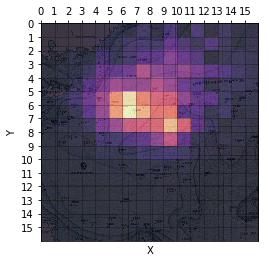

In [4]:
show_pmf(submarine_pmf) # show the PMF on top of a map

### Outcomes and events
Compute the the following values, all of which are scalars. The notation [x1, y1] -> [x2, y2] indicates a box that should **include** `x1,y1,x2,y2`.

* `in_0_0` probability submarine is in square [0,0]
* `out_5_10` probability submarine is not in square [5,10]
* `below_10` probability submarine is in square [x, y<10]
* `y_div_3` probability submarine has a y coordinate exactly divisible by 3
* `below_above` probability submarine is in square [x, y<10] or [x, y>=13]
* `box_1` probability submarine is in the box [3, 2] -> [5, 6] 
* `box_2` probability submarine is in the box [0, 0] -> [15, 15] 
* `evens` probability submarine has x=13 and an even y coordinate
* `odds_not_box` the *odds* that the submarine is *not* in the box [0, 5] -> [5,10]
* `odds_even` the *odds* that the submarine has an x coordinate which is even
* `logit_15` the log-odds (logits) that the submarine is in square [15, 15]
* `dlogit_box` the *change* in log-odds from the hypothesis that the submarine is in the box [0,5] -> [5, 10] to being in the box [1,1] -> [5,5]



In [5]:
in_0_0 = submarine_pmf[0,0]
out_5_10 = 1 - submarine_pmf[5,10]
below_10 = 0 
for x in range(0,16):
    for y in range(0,10):
        below_10 += (submarine_pmf[x,y])


In [6]:
y_div_3 = 0 
for x in range(0,16):
    for y in [0,3,6,9,12,15]:
        y_div_3 += submarine_pmf[x,y]


In [7]:
#below_above probability submarine is in square [x, y<10] or [x, y>=13]
below_above = below_10
for x in range(0,16):
    for y in range(13,16):
        below_above += (submarine_pmf[x,y])

#box_1 probability submarine is in the box [3, 2] -> [5, 6]
box_1 = 0
for x in range(3,6):
    for y in range(2,7):
        box_1 += (submarine_pmf[x,y])
        
#box_2 probability submarine is in the box [0, 0] -> [15, 15]
box_2 = 0
for x in range(0,16):
    for y in range(0,16):
        box_2 += submarine_pmf[x,y]

In [8]:
def odds(p):
    return (1-p)/p


#evens probability submarine has x=13 and an even y coordinate
evens = 0
for y in range(0,16):
    if y%2==0:
        evens += submarine_pmf[13,y]


#odds_not_box the odds that the submarine is not in the box [0, 5] -> [5,10]
prob_not_box = 0 
for x in range(0,6):
    for y in range(5,11):
        prob_not_box += (submarine_pmf[x,y])
odds_not_box = odds(prob_not_box)

#odds_even the odds that the submarine has an x coordinate which is even
prob_even = 0
for x in range(0,16):
    for y in range(0,16):
        if x%2==0:
            prob_even += (submarine_pmf[x,y])
odds_even = odds(prob_even)
        

In [9]:
# logit_15 the log-odds (logits) that the submarine is in square [15, 15]

def log_odds(p):
    return np.log((p)/(1-p))

logit_15 = log_odds(submarine_pmf[15,15])


# dlogit_box the change in log-odds from the hypothesis that the submarine 
#is in the box [0,5] -> [5, 10] to being in the box [1,1] -> [5,5]

tempbox1 = odds_not_box
tempbox2 = 0 
for x in range(1,6):
    for y in range(1,6):
        tempbox2 += submarine_pmf[x,y]
tempbox2 = log_odds(tempbox2)

dlogit_box = (tempbox1 - tempbox2)


In [10]:
with tick.marks(1):
    assert check_scalar(in_0_0, '0xf098ab67')

In [11]:
with tick.marks(1):
    assert check_scalar(out_5_10, '0x600b5303')

In [12]:
with tick.marks(1):
    assert check_scalar(below_10, '0xf447b229')

In [13]:
with tick.marks(1):
    assert check_scalar(y_div_3, '0xdaa43a7a')

In [14]:
with tick.marks(1):
    assert check_scalar(below_above, '0x8ea462bf')

In [15]:
with tick.marks(1):
    assert check_scalar(box_1, '0xbfd63576')

In [16]:
with tick.marks(1):
    assert check_scalar(box_2, '0xb44c37ea')

In [17]:
with tick.marks(1):
    assert check_scalar(evens, '0xe15059d5')

In [18]:
with tick.marks(1):
    assert check_scalar(odds_not_box, '0x5a865754')

In [19]:
## Hidden test checking odds_even [1 marks]

In [20]:
with tick.marks(1):
    assert check_scalar(logit_15, '0xffd50cbe')

In [21]:
# Hidden test checking dlogit_box [2 marks]

---

### Part 1.2 Expected value
You need to plan for the search operation. There is a fixed search station at square x=14, y=2. Assume the Euclidean (L2) norm in measuring distances. The time in hours to search a grid square from the station is given by `time = distance**2 + 4*distance + 10`.  Compute:

* `expected_location` Expected value of the submarine location.
* `expected_distance` expected value of the distance of the submarine to this fixed station 
* `total_search_time` the **total** search time required to search the every square on the entire grid. Assume each search of a grid square has to restart from the station.
* `expected_search_time` expected search time of a random search starting at the station.

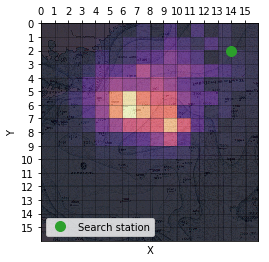

In [22]:
show_pmf(submarine_pmf)
plt.plot(14,2, 'C2o', label='Search station', markersize=10)
plt.legend(loc='lower left');

In [23]:
expected_x = 0
expected_y = 0

for x in range(0,16):
    for y in range(0,16):
        expected_x += x*submarine_pmf[x,y] 
        expected_y += y*submarine_pmf[x,y]
        
expected_location = [expected_x,expected_y]
print(expected_location)

[7.577816231120855, 5.753628250188578]


In [24]:
sub = np.array(expected_location)
station = np.array([14,2])
vals = range(0,16)
expected_distance = 0
total_search_time = 0 
expected_search_time = 0 


for x in range(0,16):
    for y in range(0,16):
        e = np.linalg.norm(station-np.array([x,y]))
        expected_distance += e*submarine_pmf[x,y]
        total_search_time += (e**2)+(4*e)+10
        expected_search_time += (expected_distance**2)+(4*expected_distance)+10

In [25]:
with tick.marks(3):
    assert check_scalar(expected_location[0], '0x4f9f5e7c')
    assert check_scalar(expected_location[1], '0x8805a495')

In [26]:
with tick.marks(2):
    assert check_scalar(expected_distance, '0xdd4849aa')

In [27]:
with tick.marks(2):
    assert check_scalar(total_search_time, '0x426a194c')

In [28]:
# Hidden test checking expected_search_time [3 marks]

---

### Part 1.3 Conditional probability
The search strategy could be improved if one of the $x$ or $y$ coordinates were known for sure (e.g. from another source, like satellite imaging). To identify how *much* this would help, we can use conditional probability distributions. Compute the following:


* `p_x_y` the *conditional* PMF of an finding the submarine on an x coordinate given a y coordinate $P(X_x=x|X_y=y)$ as 16x16 matrix
* `p_y_x` the *conditional* PMF of finding the submarine on a y coordinate given an x coordinate $P(X_y=y|X_x=x)$ as 16x16 matrix
* `p_y_6` the conditional PMF of the submarine being in squares with y=6, as a single 16 element vector.
* `p_even_x` the PMF of the submarine being on a given y coordinate if we know the submarine is in a grid square with even x coordinate, as a single 16 element vector. $P(X_y=y|X_x = x, x\ \text{even})$
* `p_even_y_odd_x` the PMF of the submarine being on an even y coordinate if we know the submarine is in a grid square with odd x coordinate, as a single **8 element** vector. $P(X_y=y|X_x = x, x\ \text{even}, y\ \text{odd})$



In [29]:
marg_x = np.sum(submarine_pmf, axis=0)
marg_y = np.sum(submarine_pmf, axis=1)

print(marg_y)
print(marg_x)

# p(x|y) = p(y,x) / p(y)
p_x_y = (submarine_pmf/ marg_x)

[0.01937553 0.02170045 0.02879022 0.04079724 0.06959298 0.09239263
 0.11193445 0.11344883 0.10906647 0.12561927 0.07949443 0.05622131
 0.03983706 0.03594658 0.02851262 0.02726996]
[0.03572892 0.04891355 0.06023654 0.09782428 0.10066098 0.15589386
 0.15185546 0.13189327 0.06651647 0.03550794 0.02271482 0.01971854
 0.01843246 0.01810391 0.01801092 0.01798808]


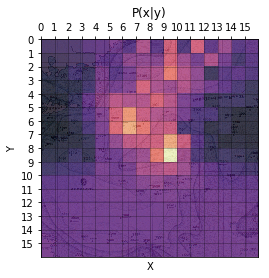

In [30]:
show_pmf(p_x_y, "P(x|y)")
with tick.marks(1):
    assert check_hash(p_x_y, ((16, 16), 2103.534977619737))

In [31]:
p_y_x = (submarine_pmf.T/ marg_y).T


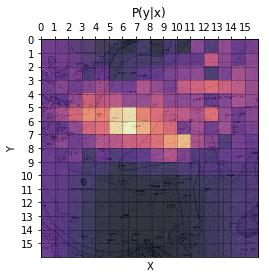

In [32]:
show_pmf(p_y_x, "P(y|x)")
with tick.marks(2):
    assert check_hash(p_y_x, ((16, 16), 2031.7414411989753))

In [33]:
# p_y_6 the conditional PMF of the submarine being in squares with y=6, 
# as a single 16 element vector.
p_y_6 = np.zeros((16))

for x in range(0,16):
    p_y_6[x] = (submarine_pmf[x,6]/np.sum(submarine_pmf[:,6]))
    

p_y_6

array([0.00842285, 0.00823479, 0.01736519, 0.0388239 , 0.07097374,
       0.13958907, 0.18054096, 0.15006388, 0.12092566, 0.12462882,
       0.03709709, 0.0380209 , 0.01748252, 0.02359002, 0.01134363,
       0.01289699])

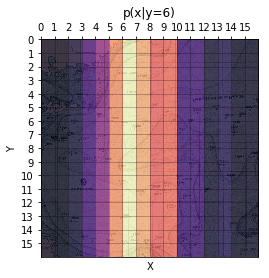

In [34]:
show_pmf(p_y_6[:,None], 'p(x|y=6)')
with tick.marks(2):
    assert check_hash(p_y_6, ((16,), 8.36846919881838))    

In [35]:
# he PMF of the submarine being on a given y coordinate if we know the submarine 
# is in a grid square with even x coordinate, as a single 16 element vector.  𝑃(𝑋𝑦=𝑦|𝑋𝑥=𝑥,𝑥 even)

p_even_x = np.zeros((16))

for x in range(0,16):
        p_even_x[x]=np.sum(submarine_pmf[::2,x]/np.sum(submarine_pmf[::2,]))
p_even_x

array([0.02549345, 0.04976335, 0.05998794, 0.09974963, 0.10150157,
       0.16075439, 0.14484879, 0.13559205, 0.06746705, 0.03652819,
       0.02356758, 0.02032014, 0.01884378, 0.01858682, 0.01851207,
       0.01848322])

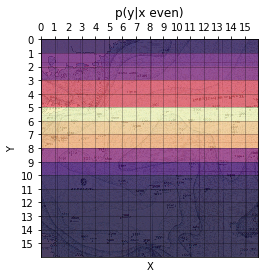

In [36]:
show_pmf(p_even_x[None,:], 'p(y|x even)')
with tick.marks(2):
    assert check_hash(p_even_x, ((16,), 7.1624313253524745))

In [37]:
p_even_y_odd_x = np.zeros((8))

i = 0 
for i, x in enumerate(range(1,16,2)):
    p = np.sum(submarine_pmf[::2,x]/np.sum(submarine_pmf[::2,]))
    p_even_y_odd_x[i] = p



In [38]:
p_even_y_odd_x

array([0.04976335, 0.09974963, 0.16075439, 0.13559205, 0.03652819,
       0.02032014, 0.01858682, 0.01848322])

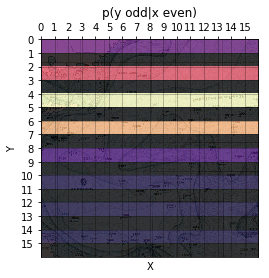

In [39]:
#Sanity check ; just to check size
with tick.marks(0):
    assert check_hash(0.0*p_even_y_odd_x, ((8,), 0.0 ))

tmp_pmf = np.stack([p_even_y_odd_x, 0*p_even_y_odd_x]).T.reshape(16,)    
show_pmf(tmp_pmf[None,:], 'p(y odd|x even)')

In [40]:
# Hidden test checking p_even_y_odd_x [3 marks]

---

### Part 1.4 Validating pmfs

`submarine_pmf` is one possible model of the submarine location. A number of others have been proposed for this 16x16 gridworld model of searching by the scientific reserach team; but some of t
hem are implemented incorrectly and are not valid PMFs. These probability mass functions are stored in a list of matrices 16x16 `proposed_pmfs`. Identify which of these PMFs are *valid* PMFs and store the valid ones in a list `valid_pmfs`.


In [41]:
# properties 

# all probabilities are are between 0 and 1
def axiom_1(pmf):
    for x in range(0,16):
        for y in range(0,16):
            if pmf[x,y]<0 or pmf[x,y]>1:
                return False
            
    return True

# sum is equal to 1

def axiom_2(pmf):
    pmf= np.matrix(pmf)
    if pmf.sum()==1.0:
        return True
    return False


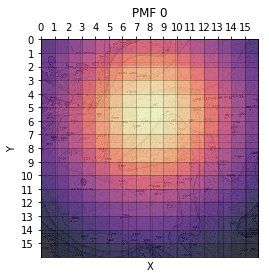

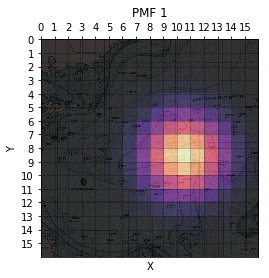

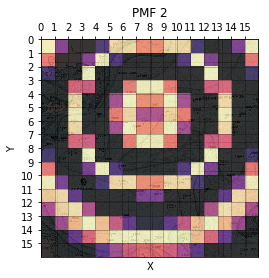

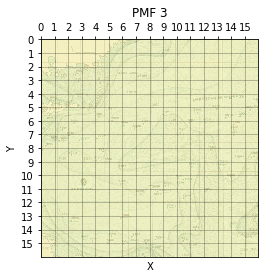

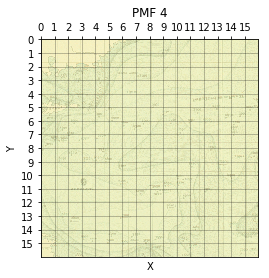

In [42]:
valid_pmfs = []

# show each of the PMFs
for i,pmf in enumerate(proposed_pmfs):
    show_pmf(pmf, title=f"PMF {i}")
    if axiom_1(pmf) and axiom_2(pmf): 
        valid_pmfs.append(pmf)


In [43]:
with tick.marks(3):
    check_hash(valid_pmfs, ((2, 16, 16), 511.54549199055594 ))

---

### Part 1.5 Sampling
We can use sampling to simulate where the submarine might lie on the sea floor. Write a function `sample_submarine(n)` which will randomly sample submarine locations according to `submarine_pmf`, returning a `nx2` array of sampled locations. 

Hint: there are 256 possible grid squares and you may want to consider  `np.random.choice` to sample from a pmf.


In [44]:
def sample_submarine(n):
    sampled_locations = []
    vals = np.arange(256)
    pmf = submarine_pmf.ravel()
    choices = np.random.choice(a=vals, size=n, p=pmf)
    for c in choices:
        x,y=(np.where(submarine_pmf==pmf[c]))
        sampled_locations.append([x[0],y[0]])
    return np.array(sampled_locations)
    
sample_submarine(1)
    

array([[7, 3]])

In [45]:
with tick.marks(3):    
    for n in [2, 4, 10, 1000, 5000]:
        samples =  sample_submarine(n)
        assert samples.shape == (n,2)
        assert np.sum(samples - np.floor(samples)) == 0.0
        mean = np.mean(samples, axis=0)
        sem = np.std(samples, axis=0)/np.sqrt(n)    
        assert np.all((mean-sem < [7.93, 5.67]) | ([7.93, 5.67] < mean+sem))

---

### Part 1.6 Reconstruct the PMF

From our samples (more realistically samples would be coming from an other source), we can reconstruct an approximation of the PMF. Write a function `reconstruct_pmf(samples)` that will reconstruct the PMF using the empirical distribution from a set of samples and return the reconstructed PMF as a 16x16 matrix. 


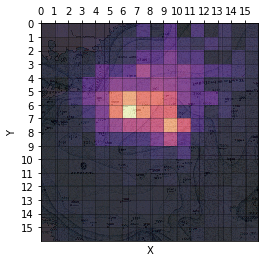

In [46]:
def reconstruct_pmf(samples):
    reconstructed = np.zeros([16,16])
    for x in range(len(samples)):
        xc = int(samples[x,0])
        yc = int(samples[x,1])
        reconstructed[xc,yc] += 1
    reconstructed = reconstructed / np.sum(reconstructed)
    
    return reconstructed

emp = reconstruct_pmf(sample_submarine(10000))
show_pmf(emp)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


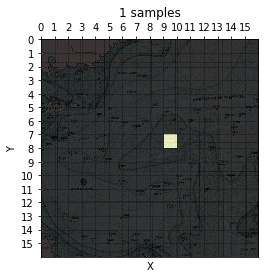

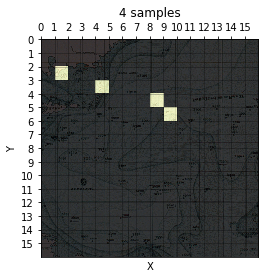

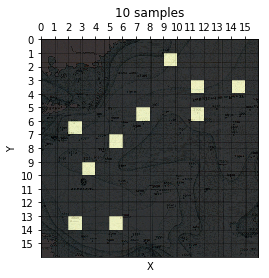

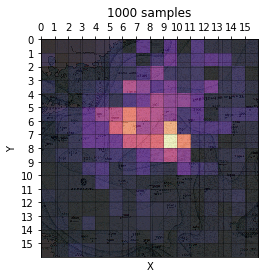

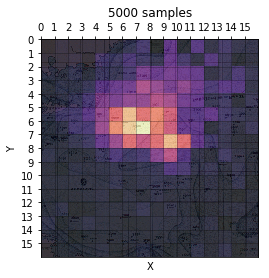

In [47]:

def kl(a, b):
    return np.sum(np.where((b<1e-10)|(a<1e-10), 0.0, a * np.log(a/b)))

with tick.marks(2):    
    kls = [4.0, 3.5, 2.5, 0.1, 0.02]
    for i,n in enumerate([1, 4, 10, 1000, 5000]):        
        approx_pmf =  reconstruct_pmf(sample_submarine(n))
        assert approx_pmf.shape == submarine_pmf.shape
        assert check_scalar(np.sum(approx_pmf), "0xb44c37ea")     
        assert np.max(approx_pmf)<=1.0
        assert np.min(approx_pmf)>=0.0
        kl_div = abs(kls[i] - kl(approx_pmf, submarine_pmf))/kls[i]        
        assert kl_div < 1.0             
        sample = reconstruct_pmf(sample_submarine(n))
        show_pmf(sample, f"{n} samples")        

---

### Part 1.7 Log likelihood
Various theoretical models of oceanographic features have been used to simulate what happened to the submarine. 

* crater
* zeeman_shift
* oblov_1
* minority
* inviscid

Each of these models produces a collection of simulated submarine locations as a result.

`submarine_samples` provides a dictionary with samples from various named submarine position generating functions. Compute the *log*-likelihood of each sequence $\log \mathcal{L}(x_1, x_2,\dots)$ under the model defined by the PMF `submarine_pmf`. 
* `sequence_lliks`  a dictionary that maps the names to the log-likelihood.
* `most_likely_sequence` the name of the sequence is most likely to be compatible with this model (a string).


In [48]:
print(submarine_samples.keys())

dict_keys(['crater', 'zeeman_shift', 'oblov_1', 'minority', 'inviscid'])


In [49]:
def log_likelihood(sequence, p):
    result = 0.0 
    for position in sequence:
        result = result + np.log(p[position[0], position[1]])
    return result

sequence_lliks = {}

for i in submarine_samples.keys():
    sequence_lliks[i] = log_likelihood(submarine_samples.get(i), submarine_pmf)

In [50]:
sequence_lliks

{'crater': -674.5851127039633,
 'zeeman_shift': -495.1125901495219,
 'oblov_1': -603.5944982683787,
 'minority': -606.1277196511766,
 'inviscid': -553.3337126608025}

In [51]:

hashes = {
    "crater": "0x7315af59",
    "zeeman_shift": "0x73114def",
    "oblov_1": "0xeb8d319c",
    "minority": "0xf8150629",
    "inviscid": "0xfab3048e",
}

with tick.marks(3):
    for key in submarine_samples.keys():
        print(key, sequence_lliks[key])
        assert check_scalar(sequence_lliks[key], hashes[key])

crater -674.5851127039633
zeeman_shift -495.1125901495219
oblov_1 -603.5944982683787
minority -606.1277196511766
inviscid -553.3337126608025


In [52]:
# Hidden test checking the string most_likely_sequence [1 mark]

---

### Part 1.8 Bayes' rule

The function `search_submarine(x,y)` returns **evidence** for the submarine's location, given an `x` and `y` coordinate to search at based on sonar returns from a search ship. It returns this as a 16x16 matrix.

* `submarine_posterior`: Using `submarine_pmf` as a prior, compute the posterior PMF using the result of `search_submarine(10, 7)` as evidence. 

In [53]:
evidence = search_submarine(10,7)
prior = submarine_pmf

submarine_posterior = evidence*prior/np.sum(evidence*prior)



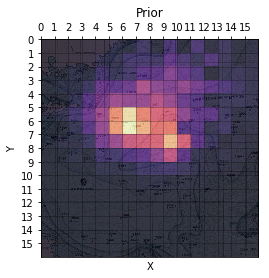

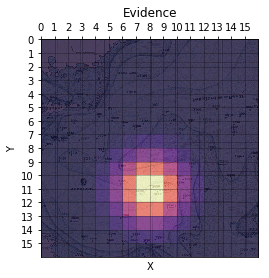

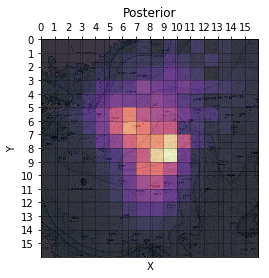

In [54]:
show_pmf(submarine_pmf, 'Prior')
show_pmf(search_submarine(10,7), 'Evidence' )
show_pmf(submarine_posterior, 'Posterior')
with tick.marks(3):
    assert check_hash(submarine_posterior, ((16, 16), 129.2249265521699))

---

### Part 1.9 Sequential searching 
Compute the posterior distribution after searching each of the squares y=8, x=0...16 (i.e. testing *each* of these 16 squares ***in turn***, and combining *all* of the evidence into a posterior), storing the posteriors as a list, starting with the prior and ending with the posterior after observing y=8, x=16. You should have a 17 element list of 16x16 matrices. Store this as `search_strip_posterior`


In [55]:
search_strip_posterior = [submarine_pmf] 


for x in range(0,16):
    
    evidence = search_submarine(x,8)
    submarine_posterior = evidence*submarine_pmf/np.sum(evidence*submarine_pmf)
    search_strip_posterior.append(submarine_posterior)
    

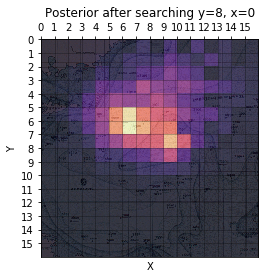

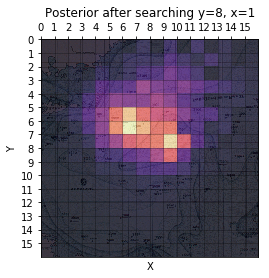

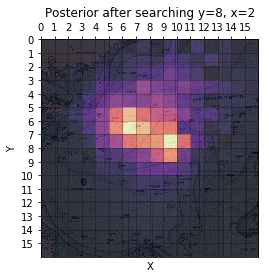

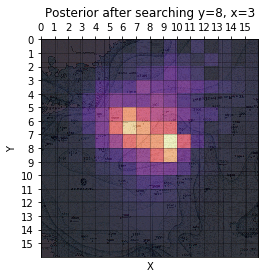

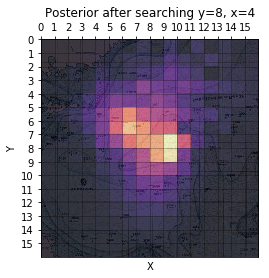

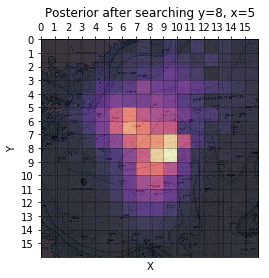

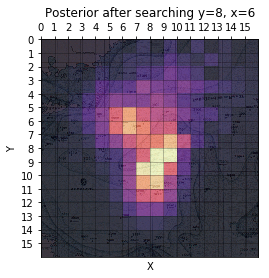

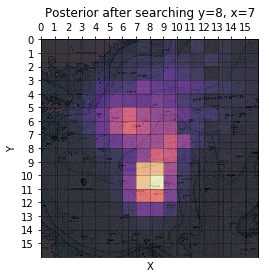

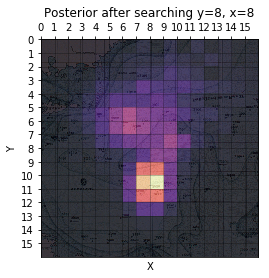

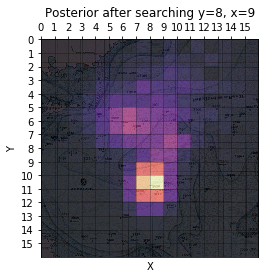

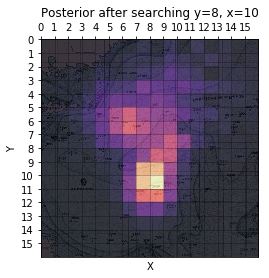

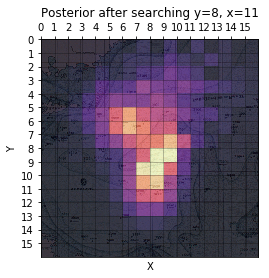

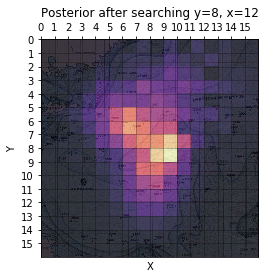

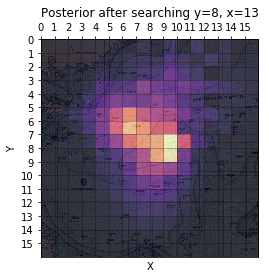

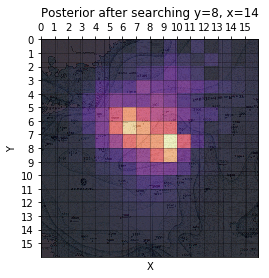

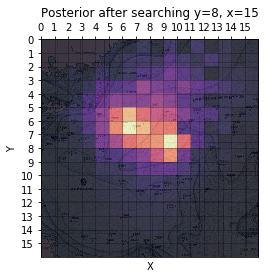

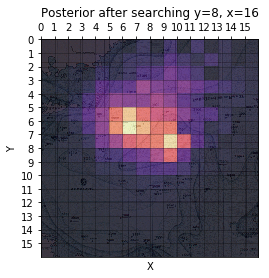

In [56]:
# Sanity check that the size is ok [0 marks]
with tick.marks(0):
    assert(len(search_strip_posterior)==17)
    assert(search_strip_posterior[0].shape==(16, 16)) # only check one of the 17 matricies

# Show the 17 individual posteriors
for i, p in enumerate(search_strip_posterior):
    show_pmf(p, f'Posterior after searching y=8, x={i}')


In [57]:
# Hidden test checking search_strip_posterior [4 marks ]

---

---


---

---

## Part 2. Hunt the submarine: continuous version
The simple discrete grid model is easy to do computations with but not a very realistic model. A better world model is that locations are *continuous* in nature; for example points specified as longitude and latitude. To work with this model probabilistically, we need to use (multivariate, i.e. vector) **probability density functions** which map coordinates to *density*, not probability.



### Multivariate normal distribution
The PDF for the multivariate Normal distribution is defined as follows (for column vectors):

$$f_{{X}}(\vec{x})=\frac{1}{\sqrt{(2\pi)^d|\boldsymbol\Sigma|}}\operatorname{exp}\left( -\frac{1}{2} (\vec{x}-\boldsymbol\mu)^\top \boldsymbol\Sigma^{-1} (\vec{x}-\boldsymbol\mu)   \right)$$
where $\boldsymbol\mu$ is the mean (vector), $d$ is the dimension of $\vec{x}$ and $\boldsymbol\Sigma$ is the $dxd$ covariance matrix.

### Continuous distributions
A continuous random variable can be represented as a class that has parameters and that provides two functions:

* `llik` the log-likelihood of an observation
* `sample` that returns a sample from a distribution

The multivariate normal PDF is implemented below using standard `scipy` implementations along with useful methods for drawing the density for debugging.

In [58]:
import scipy.stats
from jhwutils.ellipse import _cov_ellipse

class MultivariateNormal:
    
    def __init__(self, mu, sigma):
        # use the existing implementation in scipy.stats
        self.mu = mu
        self.sigma = sigma
        self.distribution = scipy.stats.multivariate_normal(self.mu, self.sigma)
    
    # log-likelihood of one observation
    def llik(self, x):
        return self.distribution.logpdf(x)
    
    # n random samples
    def sample(self, n):
        return self.distribution.rvs(n)        
        
    # render the distribution pdf as if it were a PMF
    def draw(self):            
        span = np.linspace(0,16,160)
        grid = np.array(np.meshgrid(span, span)).reshape(2, -1).T        
        pdf = self.distribution.pdf(grid)        
        show_pmf(pdf.reshape(160,160).T)                        

---

### Part 2.1
Instantiate a multivariate Normal distribution using the `MultivariateNormal` class defined above. Store it in `x`. E.g. `x = MultivariateNormal(mu=m, sigma=S)`

The PDF should have mean with coordinates (7,8), variance of one along both the latitude and longitude direction, and a covariance of 0.8.


In [59]:
m = [7,8]
S = [[1.0, 0.8], [0.8, 1.0]]

x = MultivariateNormal(mu=m, sigma=S)

In [60]:
# Autograded [2 marks]

with tick.marks(2):
    assert check_hash(x.mu, ((2,), 53.5))
    assert check_hash(x.sigma, ((2,2), 12.700000000000001))


**Try varying these parameters (in a new unassessed cell) and viewing the resulting distributions to understand what effect they have:**

---

### Part 2.2 Fitting with direct computation

There are a collection of *observed* potential locations for the submarine from a search ship in `submarine_observations`. The problem is to fit the parameters of a PDF given these observations.

Recall that the **arithmetic mean** is sum of sample values $\vec{x}_1, \vec{x}_2, \dots, \vec{x}_n$ divided by the number of values:
$$\hat{\boldsymbol\mu} = \frac{1}{n} \sum_{i=1}^n \vec{x}_i$$

The empirical covariance is computed by:

$${\boldsymbol{\hat \Sigma }} = \frac{1}{{n - 1}}\sum\limits_{i = 1}^n {{{\left( {{{\mathbf{x}}_i} - {\boldsymbol{\hat \mu }}} \right)}^T}\left( {{{\mathbf{x}}_i} - {\boldsymbol{\hat \mu }}} \right)} $$

Under the assumption that a reasonable model for the submarine location is a multivariate normal:

* directly estimate the parameters for a `MultivariateNormal` using standard numpy functions (which we have used in previous labs and several lectures) and store the result in `normal_mu_hat` and `normal_sigma_hat`.
* `llik_normal` the log-likelihood of the *entire* set of observations under this model (i.e. with these parameters)
* `samples_normal` 250 samples drawn from the multivariate normal model with these parameters
* `llik_misfit` how much smaller the log-likelihood of observations is compared to the samples *generated under the model* (i.e. `samples_normal`). This should be a negative number.

In [61]:
submarine_observations = np.loadtxt('data/submarine.txt')

In [62]:
# Set a seed - DO NOT MODIFY
np.random.seed(2019)
############################

x = np.sum(submarine_observations[:,0])/len(submarine_observations[:,0])
y = np.sum(submarine_observations[:,1])/len(submarine_observations[:,1])

normal_mu_hat = [x, y]

normal_sigma_hat = (submarine_observations - normal_mu_hat).T.dot((submarine_observations - normal_mu_hat)) / (len(submarine_observations) -1)

mv = MultivariateNormal(normal_mu_hat, normal_sigma_hat )

llik_normal = np.sum(mv.llik(submarine_observations))

samples_normal = mv.sample(250)

llik_misfit = llik_normal - np.sum(samples_normal)



Text(0.5, 1.0, 'Log-likelihood = -861.07')

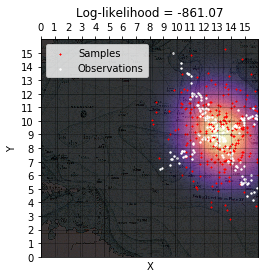

In [63]:
x = MultivariateNormal(normal_mu_hat, normal_sigma_hat)

x.draw()
ax = plt.gca()
ax.scatter(samples_normal[:,0], samples_normal[:,1], c='r', marker='x', s=1, label="Samples")
ax.scatter(submarine_observations[:,0], submarine_observations[:,1], marker='o', color='w', s=2, label="Observations")
ax.set_xlim(0,16)
ax.set_ylim(0,16)
ax.legend()
ax.set_title(f"Log-likelihood = {llik_normal:.2f}")

In [64]:
with tick.marks(3):
    check_hash(normal_mu_hat, ((2,), 78.24708797223835))
    check_hash(normal_sigma_hat, ((2,2), 30.158815848656694))    

In [65]:

with tick.marks(2):
    assert samples_normal.shape == (250, 2)
    assert np.all(np.std(samples_normal, axis=0)>0.5)
    assert np.all(np.mean(samples_normal, axis=0) - np.array([13, 9]) < 4.0 * (np.std(samples_normal, axis=0)/np.sqrt(250)))  

In [66]:
# Hidden test checking the scalar llik_normal [2 marks]

In [67]:
# Hidden test checking the scalar llik_misfit [2 marks]

---

### Part 2.3: A cross search pattern

Scientists argue that a better model for the location of the submarine is a cross-shaped density that reflects two possible ocean currents in the Atlantic and is also easier to search by ship. The scientists have written a probabilistic model which gives the density of a specialised "cross distribution". This is a non-standard distribution that has four parameters: `ctr`, `span`, `leg` and `angle`.

<img src="imgs/ship_cross.png" width="50%">


In [68]:
class CrossDistribution:
    def __init__(self, ctr, span, leg, angle):
        self.ctr = ctr
        leg = 1.0 + np.log(leg + 1.0)
        s, c = np.sin(np.radians(angle)), np.cos(np.radians(angle))
        r1 = np.array([[s / leg, c * leg], [c / leg, -s * leg]])
        r2 = np.array([[-c / leg, s * leg], [s / leg, c * leg]])
        scale = np.eye(2) * np.sqrt(span)
        self.arm1 = scipy.stats.multivariate_normal(self.ctr, r1 @ scale @ scale @ r1.T)
        self.arm2 = scipy.stats.multivariate_normal(self.ctr, r2 @ scale @ scale @ r2.T)

    # log-likelihood of one observation
    def llik(self, x):
        return np.log((self.arm1.pdf(x) + self.arm2.pdf(x)) / 2.0)

    # n random samples
    def sample(self, n):
        a1_samples = self.arm1.rvs(n)
        a2_samples = self.arm2.rvs(n)
        return np.where(np.random.uniform(0, 1, n) < 0.5, a1_samples.T, a2_samples.T).T

    # render the distribution pdf as if it were a PMF
    def draw(self):
        span = np.linspace(0, 16, 160)
        grid = np.array(np.meshgrid(span, span)).reshape(2, -1).T

        pdf = 0.5 * self.arm1.pdf(grid) + 0.5 * self.arm2.pdf(grid)
        show_pmf(pdf.reshape(160, 160).T)

**Try varying these parameters and viewing the resulting distributions to understand what effect they have:**

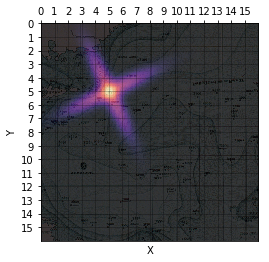

In [69]:
cf = CrossDistribution(ctr=(5,5), span=1, leg=3.0, angle=25.)
cf.draw()

---

### Part 2.4 Expectation

We would like to be able to compute the expected location (and search time/distance) for this model. But we can't do a simple operation with a PDF like we could with the PMF model. Instead, we can use sampling methods to approximate the expectation $\hat{\mathbb{E}}[f(X)]$.

Using the same formula `time = distance**2 + 4*distance + 10` as in Part 1, use the Monte Carlo approximation to the expectation, with 1000 samples, to compute:

* `cross_expected_location` the expected location  (a 2D vector)
* `cross_expected_distance` expected L2 distance from the fixed station at (14,2) 
* `cross_expected_time`  expected search time in hours from this station.

with a cross distribution having the parameters:
    
        ctr = (6,10)
        span = 0.5
        leg = 8.0
        angle = 45.0


In [70]:
# Seed - DO NOT CHANGE
np.random.seed(2019)
##########################

cf = CrossDistribution(ctr=(6,10), span=0.5, leg=8.0, angle=45.0)
samples = cf.sample(1000)

expected_location = np.array((14,2))
cross_expected_location = np.mean(samples, axis=0)

cross_expected_distance = np.linalg.norm(samples - expected_location, axis=1)
cross_expected_distance = np.mean(cross_expected_distance, axis=0)

cross_expected_time = (cross_expected_distance**2)+(4*cross_expected_distance) + 10

In [71]:
print(cross_expected_location)
print(cross_expected_distance)
print(cross_expected_time)

[6.0738557  9.97957694]
11.350333370588368
184.23140110584538


In [72]:
with tick.marks(1):
    assert check_scalar(np.sum(cross_expected_location), '0x36c7c001', tol=1)

In [73]:
with tick.marks(2):
    assert check_scalar(cross_expected_distance, '0x84e71c11', tol=1)
    

In [74]:
with tick.marks(2):   
    assert check_scalar(cross_expected_time, '0x2d9e066a', tol=1)

---

## Part 2.5 Estimating parameters by optimising the likelihood 
*Note* this is the difficult and challenging part of this lab.

There is no direct form to compute the parameters  `ctr`, `span`, `leg` and `angle` from `submarine_observations` in the way we could for the simple normal distribution. 

We can instead exploit the idea of maximum likelihood which aims to make inferences abou tthe parameters that where most likely to generate the observations. Recall that we have the likelihood of a single observation under the model

$$\mathcal L(\theta;\vec{x}) = f_X(\vec{x};\theta)$$

where $\theta$ are the parameters `ctr`, `span`, `leg` and `angle` and $\vec{x}$ is one of the 2d observations in `submarine_observations`.

If we assume our observations are independent and identically distributed, we can define an **objective function** for all observations, namely the product of the individual likelihood terms

$$\mathcal{L}(\theta ;{\{ {x_i}\} ^{i = 1:n}}) = -\prod\limits_{i = 1}^n {\mathcal{L}(\theta ;{x_i})} $$

If we take the log (perhaps to achieve greater numerical stability) and futher more take the negative value (as maximiseing the likelihood, is equivalent to minimiseing the negative likelihood), we get the following optimisation problem:

$$\theta^* = \argmin_\theta L(\theta)$$
$$L(\theta) = -\log \mathcal{L}(\theta | x_1, \dots, x_n) = -\sum_i \log f_X(x_i;\theta) , $$

This is *very* similar to the approximation objective function we saw in the optimisation part of this course $\|f(\vec{x};\theta)-y\|$, but we have $y=0$ and we only have a scalar output from $f$ so the norm is unnecessary. We already know how to solve this kind of problem; just optimise. This is called **maximum likelihood estimation** and is a general technique for determining parameters of a distribution which we don't know given some observations. It will find the **best** setting of parameters that would explain how the observations came to be.


Using **stochastic hill-climbing** (you can find code in the optimisation lab) and the idea of **maximum likelihood**, optimise to find the best parameter settings `theta= [ctr_x, ctr_y, span, leg, angle]` given the observations in `submarine_observations`

In the specific setting we also know that; 

* `ctr` must be a vector in [0,0] to [16,16], 
* `span` must be a scalar in range 0.0 to 20.0
* `leg` must be a scalar from 0.0 to 10.0
* `angle` must be a scalar from 0.0 to 90.0

find a best-fit estimate for `theta`. You should be able to find a good fit within 10,000 iterations. You will need to modify the stochastic hill climbing code to enforce these constraints.

In [75]:
np.random.seed(2019)
crt_x = np.array([1,16])
crt_y = np.array([5,6])
theta= np.array([0.,1.,2.,3.,4.])


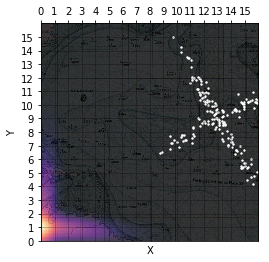

In [76]:
cf = CrossDistribution(ctr=(theta[0],theta[1]), span=theta[2], leg=theta[3], angle=theta[4])
cf.draw()
ax = plt.gca()
ax.scatter(submarine_observations[:,0], submarine_observations[:,1], marker='o', color='w', s=2, label="Observations")
ax.set_xlim(0,16)
ax.set_ylim(0,16)
fig_2_5 = plt.gcf() # do not modify

In [77]:
# Manually and auto graded [12 marks]

In [78]:
fig_2_5 = plt.gcf() # do not modify

<Figure size 432x288 with 0 Axes>


---


# Submission on Moodle


We will generate the **one** pdf file you'll need to submit along with the notebook:

*Note*: you do not need to worry about the formatting etc (that's predetermined); just make sure all your explanations are readable in the pdf and you'll be fine!


In [79]:
## Report generation - YOU MUST YOU RUN THIS CELL !
#
# This part will generate a combined pdf of your work for the manual assesment
#
# It is your responsibility to check that the PDF version represents your answer before uploading to Moodle!
#
# Ignore warnings regarding fonts
#
from matplotlib.backends.backend_pdf import PdfPages

# Declaration of originality with system info
try:
    f = open('uofg_declaration_of_originality.txt','r')
    uofg_declaration_of_originality = f.read()
except: 
    uofg_declaration_of_originality = "uofg_declaration_of_originality not present in cwd"

try:
    student_id.lower()
except: 
    student_id="NORESPONSE"
try:
    student_typewritten_signature.lower()
except: 
    student_typewritten_signature="NORESPONSE"

fn = ("idss_lab_topic_04_probability_%s_declaration.pdf" % (student_id.lower()))
fig_dec = plt.figure(figsize=(10, 12)) 
fig_dec.text(0.1,0.1,("%s\n\n Student Id %s\n\n Typewritten signature: %s\n\n UUID System: %s" % (uofg_declaration_of_originality,student_id, student_typewritten_signature, uuid_system)))
    
# Combined: 
fn = ("idss_lab_topic_04_probability_%s_combined_v20192020a.pdf" % (student_id))
pp = PdfPages(fn)
pp.savefig(fig_2_5)
pp.savefig(fig_dec)
pp.close()

with tick.marks(0):  # have you generated the combined file...? you don't actually get any credit for this; just confirmation that the file has been generated
    assert(os.path.exists(fn))

<Figure size 720x864 with 0 Axes>

**You must (for full or partial marks) submit via Moodle:**

- this notebook (completed) after "Restart and rerun all":
    - `idss_lab_topic_04_probability_v20192020a.ipynb`
    
- the combined pdf (autogenerated) containing the relevant figures and answers for the manual marking:
     - `idss_lab_topic_04_probability_[YOUR STUDENT ID]_combined_v20192020a.pdf`)
     - We will check the notebook if there are issues with the pdf version (very unlikely).


---

# Appendix: Marking Summary (and other metadata)
#### - make sure the notebook runs without errors (remove/resolve the `raise NotImplementedError()`) and "Restart and Rerun All" cells to get a correct indication of your marks.

In [80]:
print("Marks total : ","80")
print("Marks visible (with feedback): ","47")
print("Marks hidden (without feedback): ","33")
print("Marks manually graded: ","68")
print("Marks autograded (hidden+visible): ","12")
print("\nThe fraction below displays your performance on the autograded part of the lab that's visible with feedback (only valid after `Restart and Run all`:")
tick.summarise_marks() # 
print("- the autograded (and visible) marks account for at least 50% of the total lab assesment.")

Marks total :  80
Marks visible (with feedback):  47
Marks hidden (without feedback):  33
Marks manually graded:  68
Marks autograded (hidden+visible):  12

The fraction below displays your performance on the autograded part of the lab that's visible with feedback (only valid after `Restart and Run all`:


- the autograded (and visible) marks account for at least 50% of the total lab assesment.


#### History and change log:
- v20192020a: First release (22/11 2019)
